### Задача
Нарисовать траекторию пошагового спуска к минимуму градиентного метода и имитации отжига. Сравнить их работу при поиске мимимума тестовой функции.

Тестовая функция:
$$min(418.9829N + \sum\limits_{i=1}^{N}(-x_i \cdot sin(\sqrt{|x_i|}))) $$
$-500 \leq x_i \leq 500$

### Построение 3D графика (N = 2)

In [228]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import *
from numpy import meshgrid
from mpl_toolkits.mplot3d import Axes3D

In [229]:
# для градиентного спуска
def schwefel1(variable):  
    return 418.9829 * 2 - (variable * torch.sin(torch.sqrt(abs(variable)))).sum()

def schwefel2(x1, x2):  
    return 418.9829 * 2 - x1 * sin(sqrt(abs(x1))) - x2*sin(sqrt(abs(x2)))

# для линий уровня
def schwefel_np(variable):  
    return 418.9829 * 2 - (variable * np.sin(np.sqrt(abs(variable)))).sum()

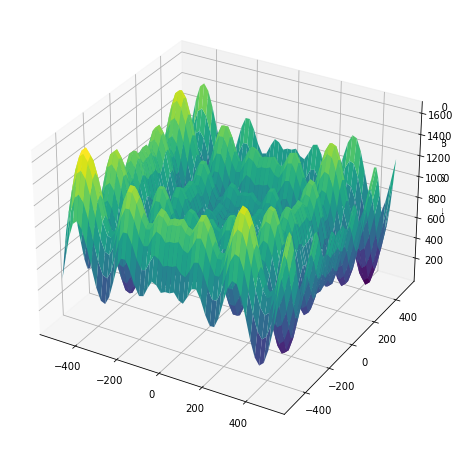

In [230]:
# создание бокса под график
fig = plt.figure(figsize= (8, 8))
ax = plt.axes(projection='3d')

# задаем x1, x2
x1 = linspace(-500, 500)
x2 = linspace(-500, 500)
  
# создает список массивов координатных 
# сеток N-мерного координатного пространства для указанных одномерных массивов координатных векторов   
X, Y = np.meshgrid(x1, x2) 

Z = schwefel2(X, Y) 
  
ax = plt.axes(projection ='3d') 
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap='viridis')

plt.show()

### Построение линий уровня

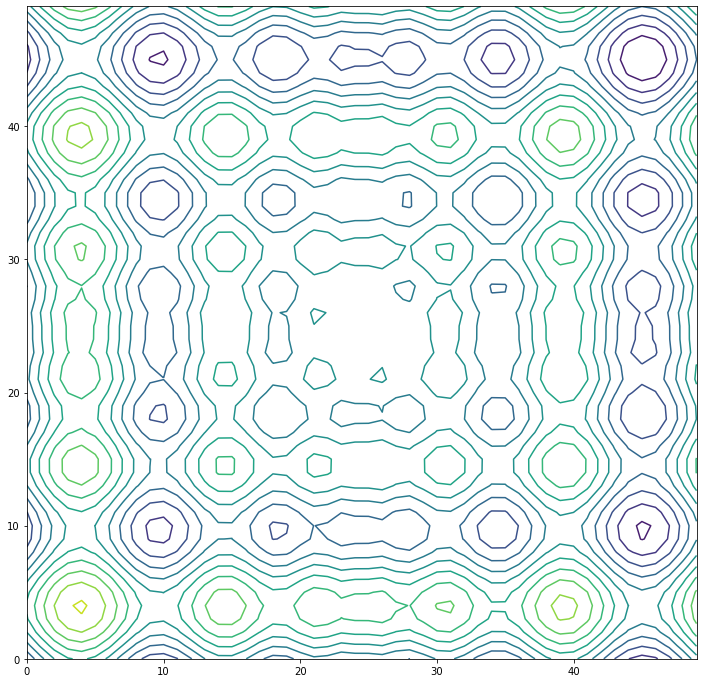

In [231]:
x1 = linspace(-500, 500)
x2 = linspace(-500, 500)
  
X, Y = np.meshgrid(x1, x2) 

Z = schwefel2(X, Y) 
fig, ax = plt.subplots()

ax.contour(Z, levels = 15)

fig.set_figwidth(12)
fig.set_figheight(12)

plt.show()

In [232]:
import torch

## Градиентный спуск

In [233]:
# шаг градиентного спуска  
alpha = 1
w = torch.tensor([320., 320.], requires_grad = True)

print(schwefel1(w))

# оптимайзер
optimizer = torch.optim.SGD([w], lr = alpha) 

var_history = []

# делаем сам спуск
for _ in range(5000):
    function = schwefel1(w)
    function.backward()
    optimizer.step() # оптимайзер сам сделает градиентный шаг
    var_history.append(w.data.cpu().numpy().copy())
    optimizer.zero_grad() # затем как обычно обнуляем градиент

tensor(1362.6196, grad_fn=<RsubBackward1>)


Функция для построения линий уровня: 

In [234]:
def show_contours(objective,
                  x_lims = [-500.0, 500.0], 
                  y_lims = [-500.0, 500.0],
                  x_ticks = 100,
                  y_ticks = 100):
    x_step = (x_lims[1] - x_lims[0]) / x_ticks
    y_step = (y_lims[1] - y_lims[0]) / y_ticks
    X, Y = np.mgrid[x_lims[0]:x_lims[1]:x_step, y_lims[0]:y_lims[1]:y_step]
    res = []
    for x_index in range(X.shape[0]):
        res.append([])
        for y_index in range(X.shape[1]):
            x_val = X[x_index, y_index]
            y_val = Y[x_index, y_index]
            res[-1].append(objective(np.array([[x_val, y_val]]).T))
    res = np.array(res)
    plt.figure(figsize = (12, 12))
    plt.contour(X, Y, res, 50)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

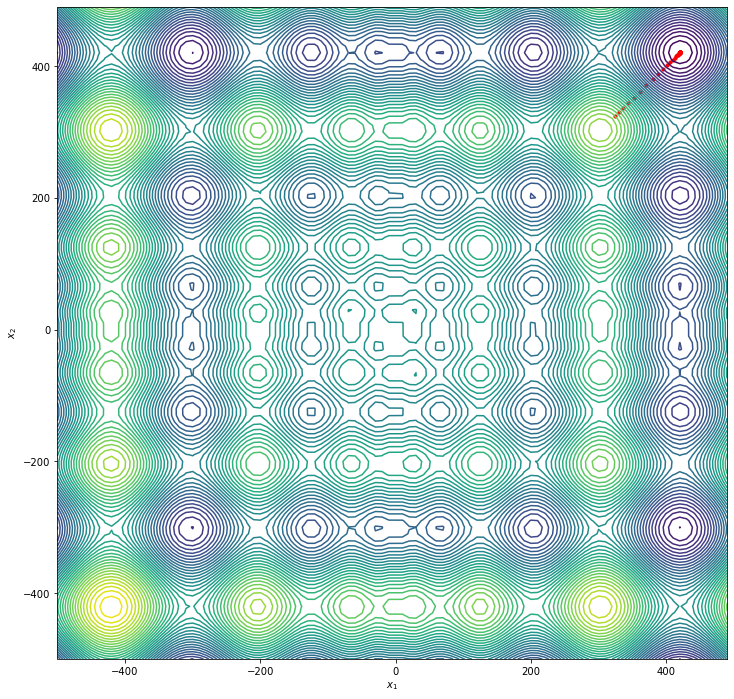

In [235]:
show_contours(schwefel_np)
plt.scatter(np.array(var_history)[:,0], np.array(var_history)[:,1], s =10, c='r');

## Метод отжига 

https://machinelearningmastery.com/simulated-annealing-from-scratch-in-python/#:~:text=Simulated%20Annealing%20is%20a%20stochastic,algorithms%20do%20not%20operate%20well.

In [236]:
from numpy import asarray
from numpy import exp
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot

Наиболее часто используемый: критерий приемлемости Метрополиса. Вероятность принятия худшего решения падает с уменьшением T, и при T → 0 параметр metropolis также приближается к нулю.


In [250]:
def simulated_annealing(objective, bounds, n_iterations, step_size, temp, val_list):
    # начальная точка
    best = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # смотрим значение в этой точке
    best_eval = objective(best)
    # текущее выходное решение
    curr, curr_eval = best, best_eval
    scores = list()
    # запускаем алгоритм
    for i in range(n_iterations):
        # делаем шаг
        candidate = curr + randn(len(bounds)) * step_size
        # запоминаем нового кандидата на лучшее решение
        candidate_eval = objective(candidate)
        # смотрим, лучше ли оно предыдущего
        if candidate_eval < best_eval:
            # если да, то записываем
            best, best_eval = candidate, candidate_eval
            # запомниаем его в списке решений
            scores.append(best_eval)
            val_list.append(best)
        # вычисляем разность между кандидатом и текущей оценкой 
        diff = candidate_eval - curr_eval
        # вычисляем температуру для этого шага
        #t = temp / float(i + 1)
        t = temp / (1 + i)
        # вычисляем критерий приемлимости метрополиса 
        metropolis = exp(-diff / t)
        # проверяем, нужно ли сохранить новую точку 
        if diff < 0 or rand() < metropolis:
            # сохраняем новую текущую точку
            curr, curr_eval = candidate, candidate_eval
    return [best, best_eval, scores, val_list]

Запустим алгоритм на произвольных параметрамх:

Done!
f([-124.89871952  203.81921202]) = 513.247032


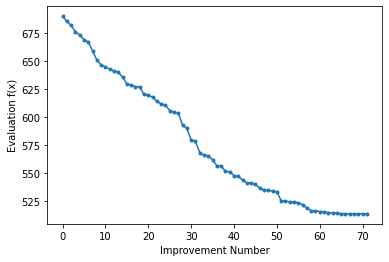

In [249]:
 # запуск генератора псевдослучайных чисел
seed(1)
# диапазон для ввода
bounds = asarray([[-500., 500.], [-500., 500.]])
# количество итераций
n_iterations = 1000
# максимальный размер шага
step_size = 1
# начальная температура
temp = 10

val_list = []    
best, score, scores, val_list = simulated_annealing(schwefel_np, bounds, n_iterations, step_size, temp, val_list)
print('Done!')
print('f(%s) = %f' % (best, score))


# line plot of best scores
pyplot.plot(scores, '.-')
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation f(x)')
pyplot.show()

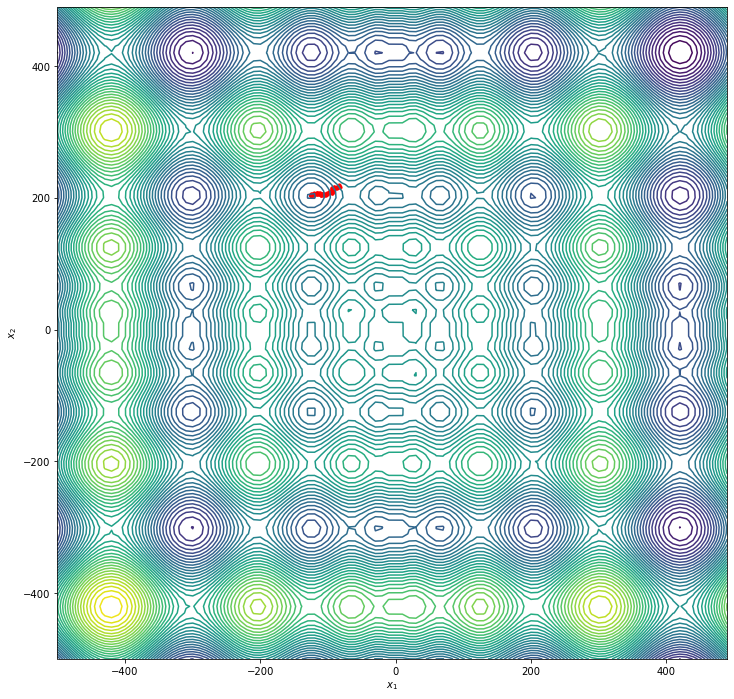

In [252]:
show_contours(schwefel_np)
plt.scatter(np.array(val_list)[:,0], np.array(val_list)[:,1], s = 10, c = 'r');

Мы нашли какой-то минимум, но он явно не глобальный. Подберем параметры для хорошего отжига.

### Поиск наилучших параметров для метода отжига

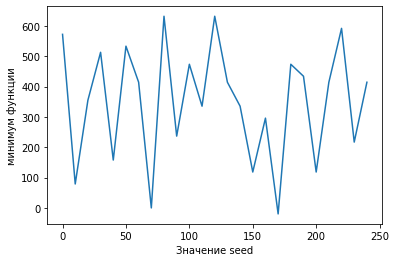

In [257]:
seeds = range(0, 250, 10) # от одного до 10 тысяч с шагом 10

func_var = [] # сюда запишем значение функции 

for i in seeds:
    seed(i)
    bounds = asarray([[-500., 500.], [-500., 500.]])
    n_iterations = 1000
    step_size = 1
    temp = 10
    val_list = []    
    best, score, scores, val_list = simulated_annealing(schwefel_np, bounds, n_iterations, step_size, temp, val_list)
    func_var.append(score)

pyplot.plot(seeds, func_var)
pyplot.xlabel('Значение seed')
pyplot.ylabel('минимум функции')
pyplot.show()

Отсюда возьмем seed = 175

/var/folders/54/lz23gw3x7fg0g6w5l5prchx80000gn/T/ipykernel_91033/2785759051.py:28: RuntimeWarning: overflow encountered in exp
  metropolis = exp(-diff / t)


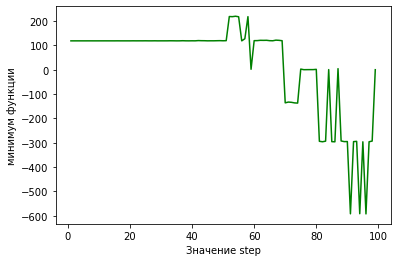

In [259]:
steps = range(1, 100, 1) # от одного до 10 тысяч с шагом 10
func_var = [] # сюда запишем значение функции 

for i in steps:
    seed(175)
    bounds = asarray([[-500., 500.], [-500., 500.]])
    n_iterations = 1000
    step_size = i
    temp = 10
    val_list = []    
    best, score, scores, val_list = simulated_annealing(schwefel, bounds, n_iterations, step_size, temp, val_list)
    func_var.append(score)

pyplot.plot(steps, func_var, c = 'g')
pyplot.xlabel('Значение step')
pyplot.ylabel('минимум функции')
pyplot.show()

Отсюда возьмем step = 80

/var/folders/54/lz23gw3x7fg0g6w5l5prchx80000gn/T/ipykernel_91033/2785759051.py:28: RuntimeWarning: overflow encountered in exp
  metropolis = exp(-diff / t)


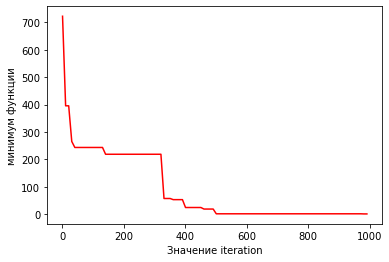

In [261]:
iterations = range(1, 1000, 10) # от одного до 10 тысяч с шагом 10
func_var = [] # сюда запишем значение функции 

for i in iterations:
    seed(175)
    bounds = asarray([[-500., 500.], [-500., 500.]])
    n_iterations = i
    step_size = 80
    temp = 10
    val_list = []    
    best, score, scores, val_list = simulated_annealing(schwefel_np, bounds, n_iterations, step_size, temp, val_list)
    func_var.append(score)

pyplot.plot(iterations, func_var, c = 'r')
pyplot.xlabel('Значение iteration')
pyplot.ylabel('минимум функции')
pyplot.show()

И отсюда максимальное количество итерацией 

### Применение идеальных параметров

Параметры находящие глобальный минимум: $seed(175)$, $n\_iterations = 1000$, $temp = 10$, $step\_size = 80$

Done!
f([420.4455174  417.58155674]) = 1.479550


/var/folders/54/lz23gw3x7fg0g6w5l5prchx80000gn/T/ipykernel_91033/2785759051.py:28: RuntimeWarning: overflow encountered in exp
  metropolis = exp(-diff / t)


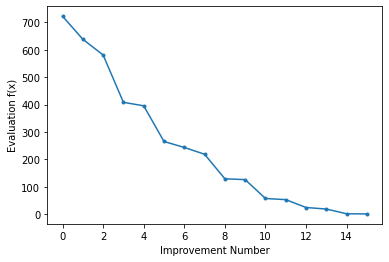

In [264]:
 # запуск генератора псевдослучайных чисел
seed(175)
# диапазон для ввода
bounds = asarray([[-500., 500.], [-500., 500.]])
# количество итераций
n_iterations = 1000
# максимальный размер шага
step_size = 80
# начальная температура
temp = 10
# perform the simulated annealing search
val_list = []    
best, score, scores, val_list = simulated_annealing(schwefel_np, bounds, n_iterations, step_size, temp, val_list)
print('Done!')
print('f(%s) = %f' % (best, score))


# line plot of best scores
pyplot.plot(scores, '.-')
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation f(x)')
pyplot.show()

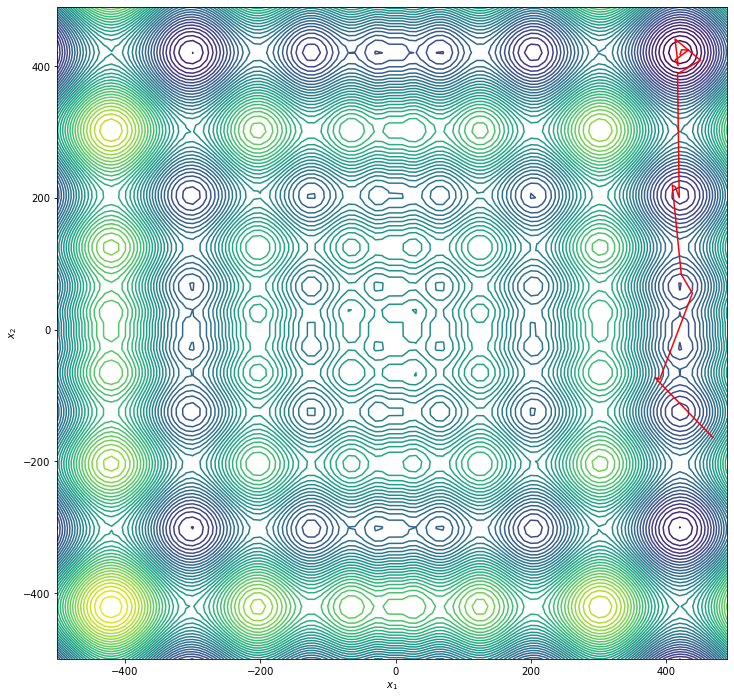

In [266]:
show_contours(schwefel_np)
plt.plot(np.array(val_list)[:,0], np.array(val_list)[:,1], c = 'r');